In [1]:
import os
import scipy
import numpy as np
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

os.chdir(os.path.dirname(os.getcwd()))

from utils import UKF, PF, PPF
from utils import StateSpaceModel, MPCTrajectory, track_example1, visualize_filter

In [2]:
np.random.seed(227)

In [3]:
x_points, y_points, line_segments = track_example1()

dist_type = 'mvn'
trajectory = MPCTrajectory(x_points, y_points, line_segments, noise_dist=dist_type, savepath='output/track_1_mvn.pkl')
states, measurements = trajectory.get_data()

system = StateSpaceModel()

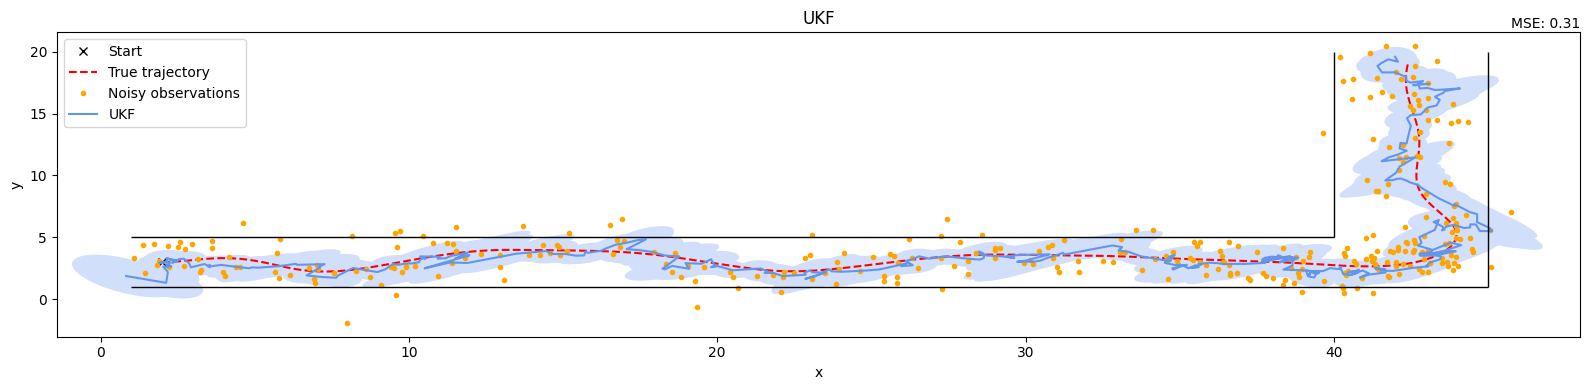

In [4]:
unscented_kalman_filter = UKF(system.f, system.h, system.Q, system.R, alpha=.5, beta=2, kappa=0, method='merwe')
state_estimates, cov_estimates = unscented_kalman_filter.filter(measurements)

visualize_filter(states, measurements, state_estimates, cov_estimates, title="UKF")

  0%|          | 0/337 [00:00<?, ?it/s]

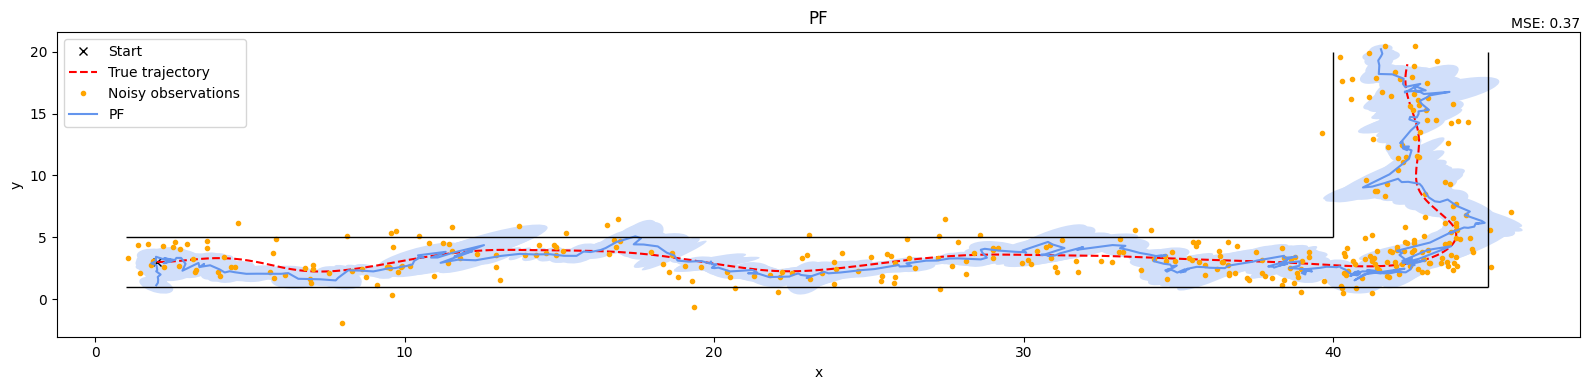

In [5]:
np.random.seed(seed)

particle_filter = PF(system.f, system.h, system.Q, system.R, N=100)
state_estimates, cov_estimates, particle_history, weights_history = particle_filter.filter(measurements, verbose=True)

visualize_filter(states, measurements, state_estimates, cov_estimates, title="PF")

In [6]:
x_points, y_points, line_segments = track_example1()

dist_type = 'mvt'
trajectory = MPCTrajectory(x_points, y_points, line_segments, noise_dist=dist_type, savepath='output/track_1_mvt.pkl')
states, measurements = trajectory.get_data()

system = StateSpaceModel()

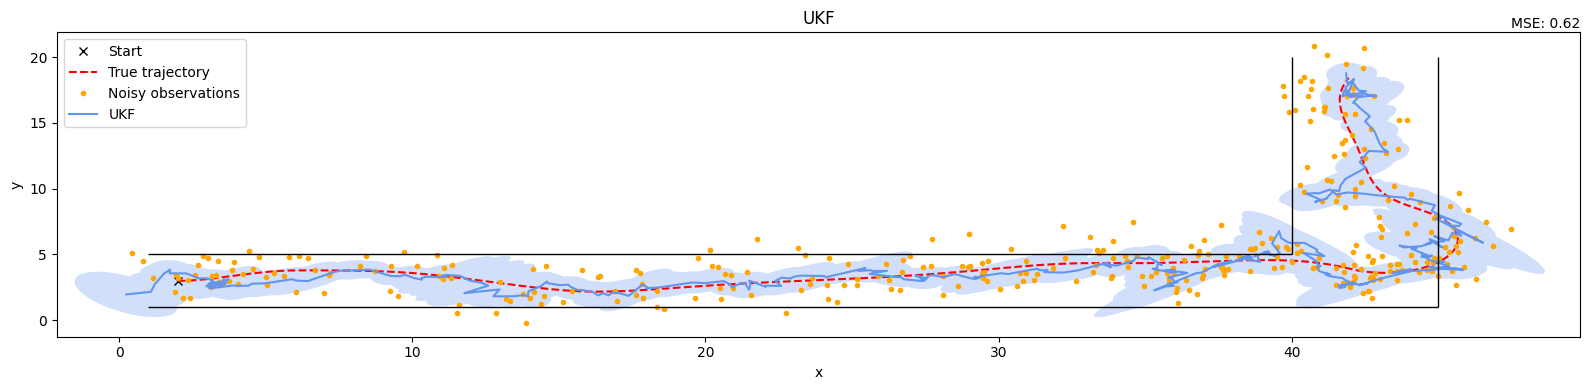

In [7]:
unscented_kalman_filter = UKF(system.f, system.h, system.Q, system.R, alpha=.5, beta=2, kappa=0, method='merwe')
state_estimates, cov_estimates = unscented_kalman_filter.filter(measurements)

visualize_filter(states, measurements, state_estimates, cov_estimates, title="UKF")

  0%|          | 0/348 [00:00<?, ?it/s]

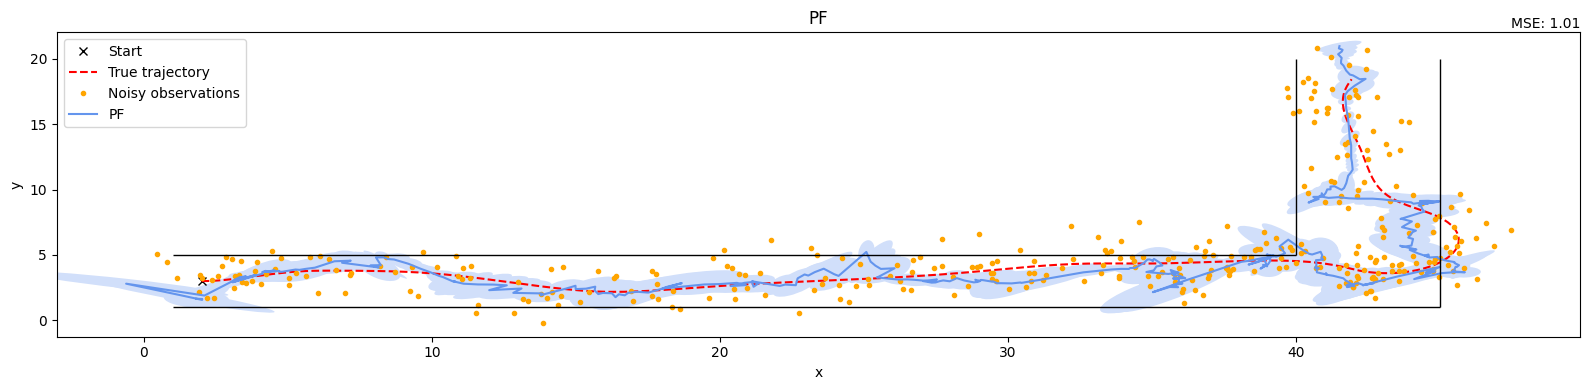

In [11]:
np.random.seed(9)

particle_filter = PF(system.f, system.h, system.Q, system.R, N=100)
state_estimates, cov_estimates, particle_history, weights_history = particle_filter.filter(measurements, verbose=True)

visualize_filter(states, measurements, state_estimates, cov_estimates, title="PF")